## ANLT-243 - NoSQL DATABASES
## ASSIGNMENT #2 - AIR QUALITY - MONGODB

__by Arda Ugur__<br>
<a_ugur1@u.pacific.edu>
<br><br/>
__University of the Pacific, School of Engineering and Computer Science<br />
Data Science Graduate Program__<br><br>
__September 2018__

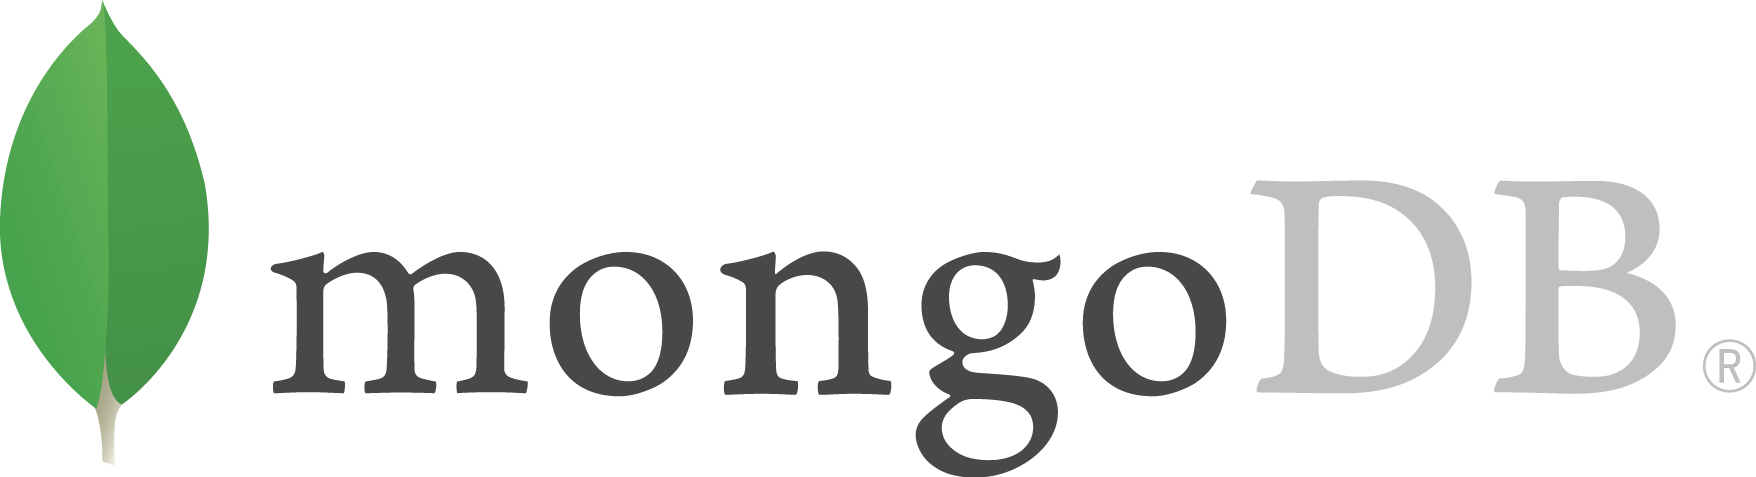

## Problem Definition:

A public air quality data is published in the __mongoDB__ database deployed with the following configuration:
<br><br>
__
host = 'ec2-54-67-15-68.us-west-1.compute.amazonaws.com'
<br>
port = 9210
<br>
Database Name : nosql
<br>
Collection Name : aq
__

Answer each of these questions using your new skills in mongodb. Do not just download the whole collection from the database into the Python program, but use separate Mongodb find statements that get you the minimal data you need to answer each question. Submit your Python program and the answers to these questions. Include appropriate print statements in your program to help answer these questions.

1. How many total records are there in this air quality collection?
<br><br>
2. What is the data type of the columns StateName, ReportYear, and Value?
<br><br>
3. What was the air quality metric value for MeasureId 83 in the Santa Barbara county in the state of California in 2013?
<br><br>
4. What is the MeasureName of MeasureId 85?
<br><br>
5. Which state and county have the highest recorded air quality value of MeasureId 85 in any year?
<br><br>
6. Print the average of air quality value and the unit for MeasureId 87, State - Florida, CountyName - Pinellas, for years between 2002 and 2008?
<br><br>
7. Based on the data provided in the air quality collection, which state do you believe has better air quality- California or Texas ? Why? Call out any assumptions you make.

## Solution

### 0. Configuration

In [59]:
# Pymongo Config
#
import pymongo
import pprint
#
from pymongo import MongoClient, ASCENDING, DESCENDING

In [61]:
# Remote Database Connection
# 
host = 'ec2-54-67-15-68.us-west-1.compute.amazonaws.com'
client = MongoClient(host, 9210)

In [69]:
# Remote Database Access
# Let us check our connection by displaying the mongoDB collections
# This part of the code referenced from the class example
#
db = client.nosql
db_names = db.list_collection_names()
#
# And now let us print the collections
# If our connection is successful, we should se the air quality collection aq listed below
# 
pprint.pprint(db_names)
#
# Note to self: Alternatively, we could also simply use db_names

['population', 'aq', 'population_Ali']


In [71]:
# Now we have access to aq colletion in remote database
# let us set user defined -personal- naming conventions
# This will help us in our coding 
#
# air_quality_data : aq collection of mongoDB
#
air_quality_data = db.aq

In [73]:
# Let us check our naming if that works
#
air_quality_data

Collection(Database(MongoClient(host=['ec2-54-67-15-68.us-west-1.compute.amazonaws.com:9210'], document_class=dict, tz_aware=False, connect=True), 'nosql'), 'aq')

### 1. How many total records are there in this air quality collection?

In [74]:
# Question 1 
# Number of total records in air quality collection
# 
# Let us call this "number_of_records_aqc"
#
number_of_records_aqc = air_quality_data.estimated_document_count()

In [75]:
print('Number of total records in the air quality collection: ', number_of_records_aqc)

Number of total records in the air quality collection:  218635


### 2. What is the data type of the columns StateName, ReportYear, and Value?

In [107]:
# Question 2
# Data type of columns - StateName, ReportYear, and Value
#
# We will use find_one() command for calling each of these columns and we will use type command of Python
# as if we are checking the type of an object
#
# aqc  - prefix for air_quality_collection column we want to refer to
# type - suffix for air_quality_collection column type we want to return
#
aqc_StateName_type = air_quality_data.find_one()
aqc_ReportYear_type = air_quality_data.find_one()
aqc_Value_type = air_quality_data.find_one()

In [108]:
# Now we can return column types following above code block
# Type of StateName column
# 
pprint.pprint(type(aqc_StateName_type['StateName']))

<class 'str'>


In [109]:
# Type of ReportYear column
# 
pprint.pprint(type(aqc_ReportYear_type['ReportYear']))

<class 'int'>


In [110]:
# Type of ReportYear column
# 
pprint.pprint(type(aqc_Value_type['Value']))

<class 'float'>


### 3. What was the air quality metric value for MeasureId 83 in the Santa Barbara county in the state of California in 2013?

In [116]:
# Similar to above question, we are can look up one record by using find_one() command
# However, this time we need to use a composite query
# We are asked to return values for MeasureId = 83 and County = Santa Barbara and Year = 2013
#
# Now let us construct a composite query 
# 
pprint.pprint(air_quality_data.find_one({"$and": [{'MeasureId': 83},
                                    {'CountyName':'Santa Barbara'},
                                    {'StateName': 'California'}, 
                                    {'ReportYear':2013}]}))

{'CountyFips': 6083,
 'CountyName': 'Santa Barbara',
 'DataOrigin': 'Monitor Only',
 'MeasureId': 83,
 'MeasureName': 'Number of days with maximum 8-hour average ozone '
                'concentration over the National Ambient Air Quality Standard',
 'MeasureType': 'Counts',
 'MonitorOnly': 1,
 'ReportYear': 2013,
 'StateFips': 6,
 'StateName': 'California',
 'StratificationLevel': 'State x County',
 'Unit': 'No Units',
 'UnitName': 'No Units',
 'Value': 1.0,
 '_id': ObjectId('5b9095467e386a181318464d')}


In [117]:
# NOTE:
# Assuming there is no other Santa Clara country in this entire collection, we could make our query code
# easier by only including 'Santa Barbara' inside of our 'and' clause and remove 'California'
# 
# I tried it and returned the same result
# commenting out this part - just leaving it as experimental
#
#
#air_quality_data.find_one({"$and": [{'MeasureId': 83},
#                                    {'CountyName':'Santa Barbara'},{'ReportYear':2013}]})

### 4. What is the MeasureName of MeasureId 85?

In [118]:
# In order to answer this question and check our answer, let us begin with calling MeasureId = 85 and
# look at the output. To do so we can use find_one() command again
# 
air_quality_data.find_one({'MeasureId':85})

{'CountyFips': 40143,
 'CountyName': 'Tulsa',
 'DataOrigin': 'Monitor Only',
 'MeasureId': 85,
 'MeasureName': 'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (NAAQS)',
 'MeasureType': 'Percent',
 'MonitorOnly': 1,
 'ReportYear': 1999,
 'StateFips': 40,
 'StateName': 'Oklahoma',
 'StratificationLevel': 'State x County',
 'Unit': '%',
 'UnitName': 'Percent',
 'Value': 0.0,
 '_id': ObjectId('5b9094f97e386a181317fb09')}

In [122]:
# Similar to Question 2, let us build a user defined naming convention to call the "MeasureName'
# We will use a similar logic and naming convention
#
# As above let us call MeasureId = 85 from air quality collection
#
aqc_MeasureId85_name = air_quality_data.find_one({'MeasureId':85})
#
# And now referencing to 'MeasureName' column, let us print the value of MeasureName column for MeasureId = 85
# Our output should match to the output in previous code block
#
pprint.pprint(aqc_MeasureId85_name['MeasureName'])

('Percent of days with PM2.5 levels over the National Ambient Air Quality '
 'Standard (NAAQS)')


### 5. Which state and county have the highest recorded air quality value of MeasureId 85 in any year?

In [136]:
# One way to look up the max value is to sort values in descending (-1) order
# Let us use a similar naming convention and map it to county and state names using a similar code to above block
#
aqc_MeasureId85_maxairq = air_quality_data.find({'MeasureId':85}).sort([('Value', -1)])

In [145]:
# We can check the cursor location for this value
# Remember we are refencing memory location! The above query should return the highest value in the first memory
# location. Thus, we may have to reference it by location!
# Note to self: Start counting from zero (0) - and also experiment with different memory locations
# 
aqc_MeasureId85_maxairq

In [149]:
# Note to self:
# See the comments above - 0th location should return the highest value
# Experiment by replacing zero with high numbers to see if it is going to return different values
#
# Now let us print the StateName with the highest value
#
pprint.pprint(aqc_MeasureId85_maxairq[0]['StateName'])

'California'


In [150]:
# Now let us print the CountyName with the highest value
#
pprint.pprint(aqc_MeasureId85_maxairq[0]['CountyName'])

'Riverside'


### 6. Print the average of air quality value and the unit for MeasureId 87, State - Florida, CountyName - Pinellas, for years between 2002 and 2008?

In [165]:
# Similar to Question 3, we will need to start with constructing a composite query structure
# To do so, we need to find all the records for MeasureId = 87 and then for StateName = Florida, etc.
# Last but not least, we also must have an interval criteria for years 2002-2008
# we can do so by using 'gt' and 'lt' function. 
# 
# Note: 'gt' and 'lt' are not inclusive
#
# Let us start with our own naming convention
#
# aqc_FLPine87_2002_08 be our criteria
#
aqc_FLPine87_2002_08 = air_quality_data.find({"$and" : [{'MeasureId': 87},
                                                        {'StateName':'Florida'},
                                                        {'CountyName':'Pinellas'},
                                                        #
                                                        # Year greater than 2001 will start from 2002
                                                        # it is exclusive thus we say >2001
                                                        #
                                                        {'ReportYear': {"$gt":2001}}, 
                                                        #
                                                        # Year less than 2009 will count down from 2008
                                                        # it is exclusive thus we say <2009
                                                        #
                                                        {'ReportYear':{"$lt":2009}}]})

In [167]:
print(aqc_FLPine87_2002_08)

In [ ]:
# 